# Descriptive Analytics

## 1. Summary statistics

In [4]:
# Import libs
import pandas as pd
import numpy as np
from scipy import stats

In [6]:
# Read file
df=pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_ba/refs/heads/main/data/merged/merged_data.csv')

In [8]:
# Review columns
df.columns

Index(['title', 'year', 'certificate', 'duration_min', 'genre', 'rating',
       'description', 'stars', 'votes', 'type', 'warnings', 'language',
       'production_countries', 'seasons'],
      dtype='object')

In [10]:
# Review dataset
df

,title,year,certificate,duration_min,genre,rating,description,stars,votes,type,warnings,language,production_countries,seasons
0,Breaking Bad,2008,TV-MA,48.0,"Drama, Comedy, Crime, Thriller",9.2,"When walter white, a new mexico chemistry teac...",Unknown,1936461.0,Show,Unknown,Unknown,US,5.0
1,Stranger Things,2016,TV-14,61.0,"Drama, Scifi, Thriller, Fantasy, Horror",8.6,"When a young boy vanishes, a small town uncove...",Unknown,1220079.0,Show,Unknown,Unknown,US,5.0
2,The Walking Dead,2010,TV-MA,46.0,"Action, Drama, Horror, Thriller",8.1,Sheriff's deputy rick grimes awakens from a co...,Unknown,1013253.0,Show,Unknown,Unknown,US,11.0
3,Peaky Blinders,2013,TV-MA,58.0,"Drama, Crime, European",8.7,"A gangster family epic set in 1919 birmingham,...",Unknown,567949.0,Show,Unknown,Unknown,GB,6.0
4,Black Mirror,2011,TV-MA,59.0,"Scifi, Drama, Thriller, European",8.6,A contemporary british re-working of the twili...,Unknown,560631.0,Show,Unknown,Unknown,GB,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10920,Blank Check,1994,UNKNOWN,0.0,Unknown,9.3,Unknown,Unknown,80.0,Unknown,Parental Guidance Suggested. May Not Be Suitab...,Unknown,UNKNOWN,0.0
10921,Heavyweights,1995,UNKNOWN,0.0,Unknown,7.4,Unknown,Unknown,80.0,Unknown,Some Rude Language And Pranks,Unknown,UNKNOWN,0.0
10922,D2: The Mighty Ducks,1994,UNKNOWN,0.0,Unknown,7.0,Unknown,Unknown,80.0,Unknown,Some Mild Language And Rough Hockey Action,Unknown,UNKNOWN,0.0
10923,"Honey, I Shrunk The Kids",1989,UNKNOWN,0.0,Unknown,8.0,Unknown,Unknown,80.0,Unknown,Parental Guidance Suggested. May Not Be Suitab...,Unknown,UNKNOWN,0.0


In [12]:
# Function to calculate mean, median, mode, and standard deviation
def calculate_statistics(df, group_by_col, target_col):
    grouped = df.groupby(group_by_col)[target_col]
    summary = pd.DataFrame({
        'Mean': grouped.mean(),
        'Median': grouped.median(),
        'Mode': grouped.apply(lambda x: stats.mode(x, keepdims=True)[0][0]),
        'Std Dev': grouped.std()
    })
    return summary

# Calculate statistics for 'production_countries','year','genre'and 'type' grouped by 'rating'
production_countries_stats = calculate_statistics(df, 'production_countries', 'rating')
year_stats = calculate_statistics(df, 'year', 'rating')
genre_stats = calculate_statistics(df, 'genre', 'rating')
type_stats = calculate_statistics(df, 'type', 'rating')

# Output the results
print("Production Countries Statistics:")
print(production_countries_stats)

print("\nYear Statistics:")
print(year_stats)

print("\nGenre Statistics:")
print(genre_stats)

print("\nType Statistics:")
print(type_stats)

Production Countries Statistics:
                          Mean  Median  Mode   Std Dev
production_countries                                  
AE                    5.464286    5.55   5.0  1.535532
AE, EG, RO, SA        4.600000    4.60   4.6       NaN
AE, LB                5.700000    5.70   5.7       NaN
AE, US                6.600000    6.60   6.6       NaN
AR                    6.513514    6.90   7.2  1.269331
...                        ...     ...   ...       ...
ZA, EG                5.800000    5.80   5.8       NaN
ZA, RW, GB            6.500000    6.50   6.5       NaN
ZA, US                6.100000    6.10   6.1       NaN
ZA, US, DE            6.600000    6.60   6.6       NaN
ZW                    5.900000    5.90   5.9       NaN

[361 rows x 4 columns]

Year Statistics:
          Mean    Median      Mode   Std Dev
year                                        
0     6.500751  6.500751  6.500751  0.000000
1932  6.500000  6.500000  5.300000  1.697056
1933  5.700000  5.700000  5.70

In [14]:
# Function to generate frequency distributions
def generate_frequency_distribution(df, column):
    frequency_distribution = df[column].value_counts()
    percentage_distribution = df[column].value_counts(normalize=True) * 100
    return pd.DataFrame({
        'Frequency': frequency_distribution,
        'Percentage': percentage_distribution
    })

In [16]:
# Generate frequency distributions for relevant categorical columns
columns_to_analyze = ['year', 'genre', 'type', 'production_countries']
for col in columns_to_analyze:
    print(f"Frequency Distribution for {col}:")
    print(generate_frequency_distribution(df, col))
    print("\n")

Frequency Distribution for year:
      Frequency  Percentage
year                       
2022       1130   10.343249
2018       1113   10.187643
2020       1110   10.160183
2021       1104   10.105263
2019       1103   10.096110
...         ...         ...
1935          1    0.009153
1959          1    0.009153
1938          1    0.009153
1933          1    0.009153
1957          1    0.009153

[87 rows x 2 columns]


Frequency Distribution for genre:
                                                  Frequency  Percentage
genre                                                                  
Comedy                                                  994    9.144434
Drama                                                   696    6.402944
Documentary                                             388    3.569457
Drama, Romance                                          291    2.677093
Comedy, Drama                                           260    2.391904
...                                     

## 2. Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_62711/2168121323.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='genre', y='rating', palette='Set3')


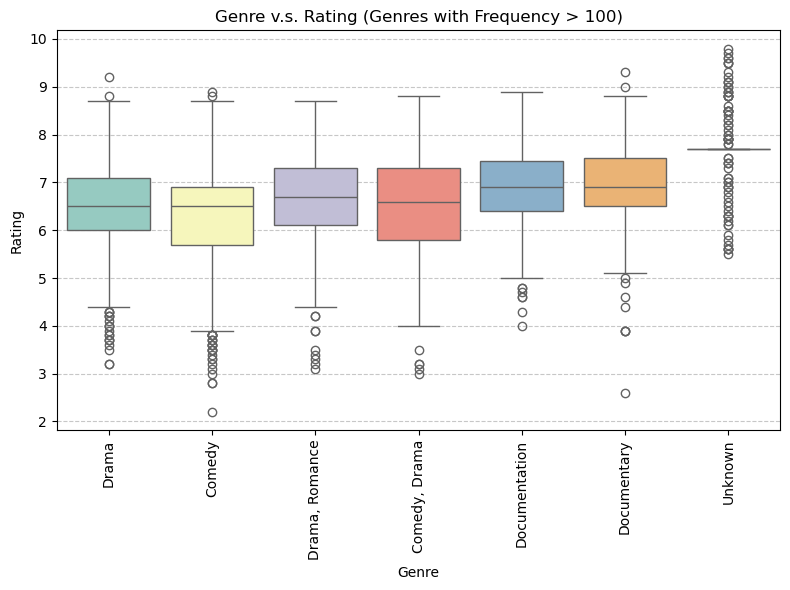

In [21]:
# Ensure 'genre' and 'rating' columns exist (replace with correct column names if needed)
if 'genre' in df.columns and 'rating' in df.columns:
    # Count the frequency of each genre
    genre_counts = df['genre'].value_counts()

    # Filter genres with frequency > 100
    filtered_genres = genre_counts[genre_counts > 200].index

    # Filter the dataset to only include these genres
    df_filtered = df[df['genre'].isin(filtered_genres)]

    # Plot a boxplot to visualize the relationship
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_filtered, x='genre', y='rating', palette='Set3')
    plt.title('Genre v.s. Rating (Genres with Frequency > 100)')
    plt.xlabel('Genre')
    plt.ylabel('Rating')
    plt.xticks(rotation=90, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_62711/705934527.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='production_countries', y='rating', data=filtered_df, palette='Set2',


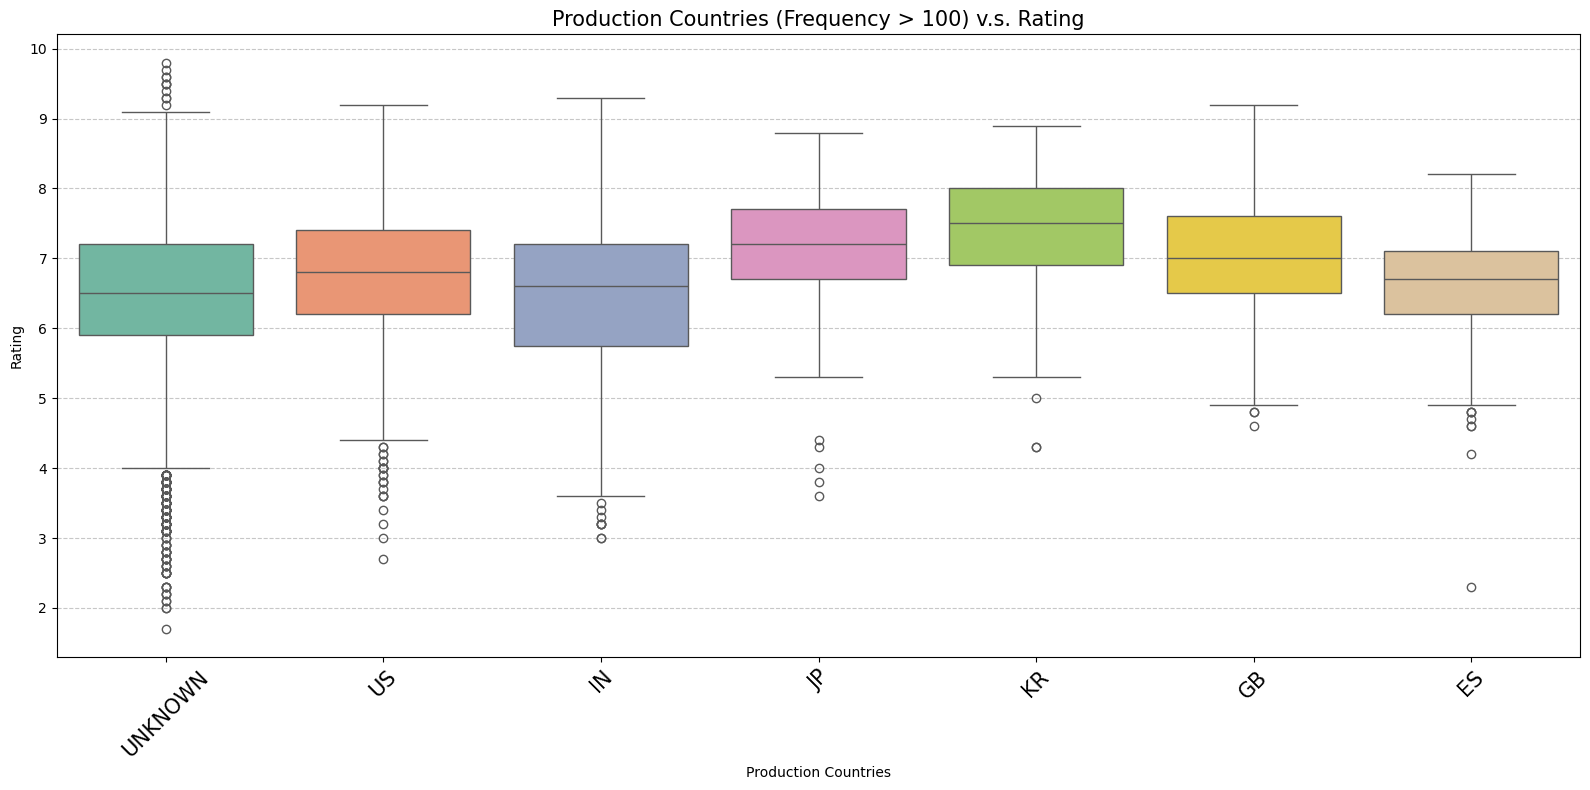

In [23]:
# Check if 'Production Countries' and 'rating' columns exist
if 'production_countries' in df.columns and 'rating' in df.columns:
    # Count the frequency of each country
    country_counts = df['production_countries'].value_counts()
    
    # Filter countries with frequency > 100
    valid_countries = country_counts[country_counts > 100].index
    filtered_df = df[df['production_countries'].isin(valid_countries)]
    
    plt.figure(figsize=(16, 8))
    
    # Box plot for the relationship between production countries and rating
    sns.boxplot(x='production_countries', y='rating', data=filtered_df, palette='Set2',
                order=valid_countries)
    
    plt.title('Production Countries (Frequency > 100) v.s. Rating',fontsize=15)
    plt.xlabel('Production Countries')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, fontsize=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Production Countries' or 'rating' column does not exist in the dataset.")

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_62711/1994305006.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='rating', data=df, palette='Set2',


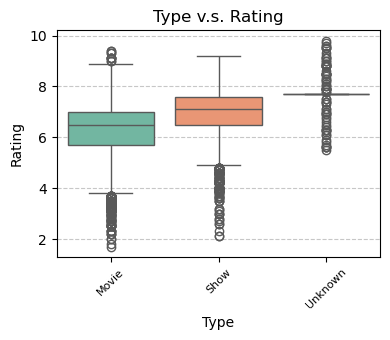

In [25]:
# Check if 'type' and 'rating' columns exist
if 'type' in df.columns and 'rating' in df.columns:
    plt.figure(figsize=(4,3.5 ))
    
    # Box plot for the relationship between type and rating
    sns.boxplot(x='type', y='rating', data=df, palette='Set2',
                order=df['type'].value_counts().index)
    
    plt.title('Type v.s. Rating')
    plt.xlabel('Type')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The 'type' or 'rating' column does not exist in the dataset.")

/var/folders/q5/bwsxp4bx3jvb0n9scz0gsk500000gn/T/ipykernel_62711/3664157621.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seasons', y='rating', data=filtered_df, palette='Set3',


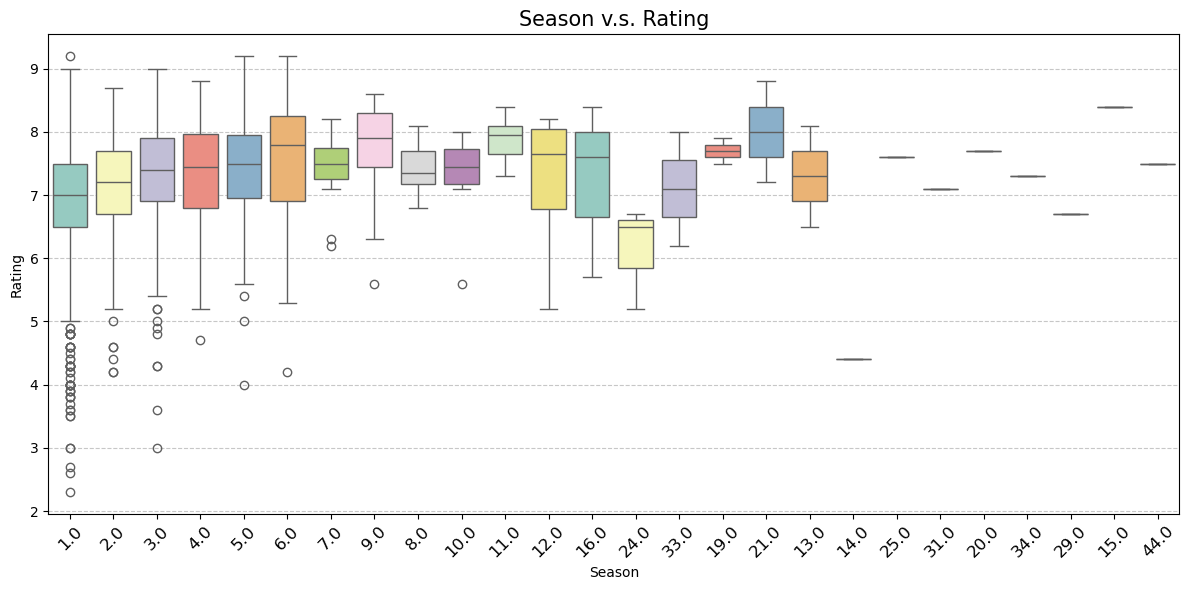

In [27]:
# Filter out rows where 'season' is 0.0
filtered_df = df[df['seasons'] != 0.0]

# Check if 'season' and 'rating' columns exist in the filtered dataset
if 'seasons' in filtered_df.columns and 'rating' in filtered_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Create a box plot for the relationship between season and rating
    sns.boxplot(x='seasons', y='rating', data=filtered_df, palette='Set3', 
                order=filtered_df['seasons'].value_counts().index)
    
    plt.title('Season v.s. Rating',fontsize=15)
    plt.xlabel('Season')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The 'season' or 'rating' column does nor exist")

## 3. Trend Analysis

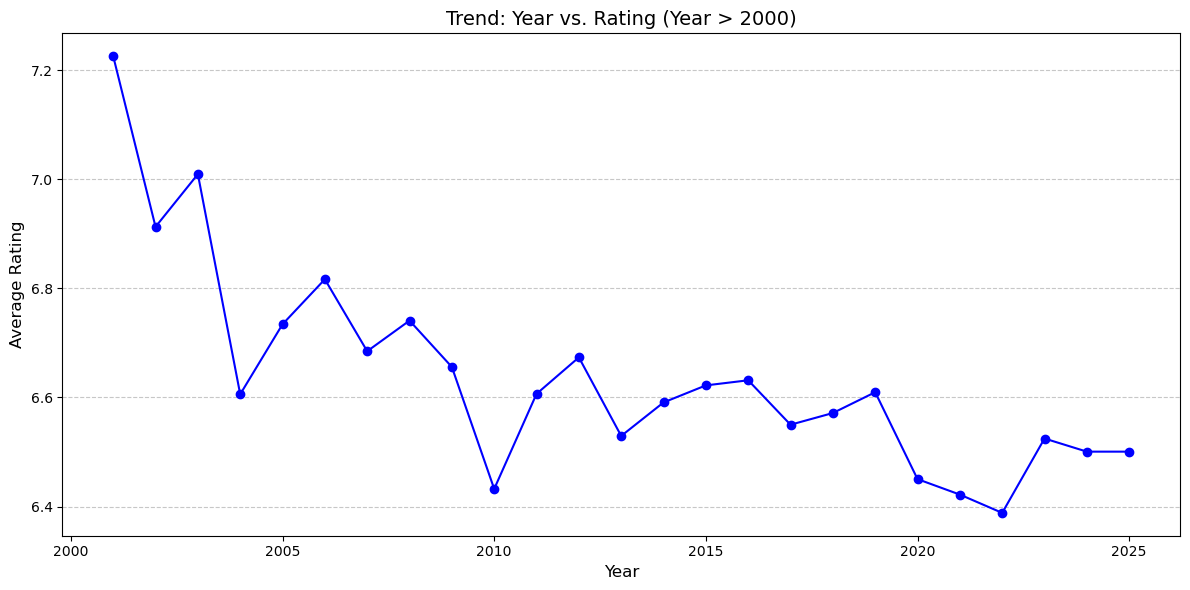

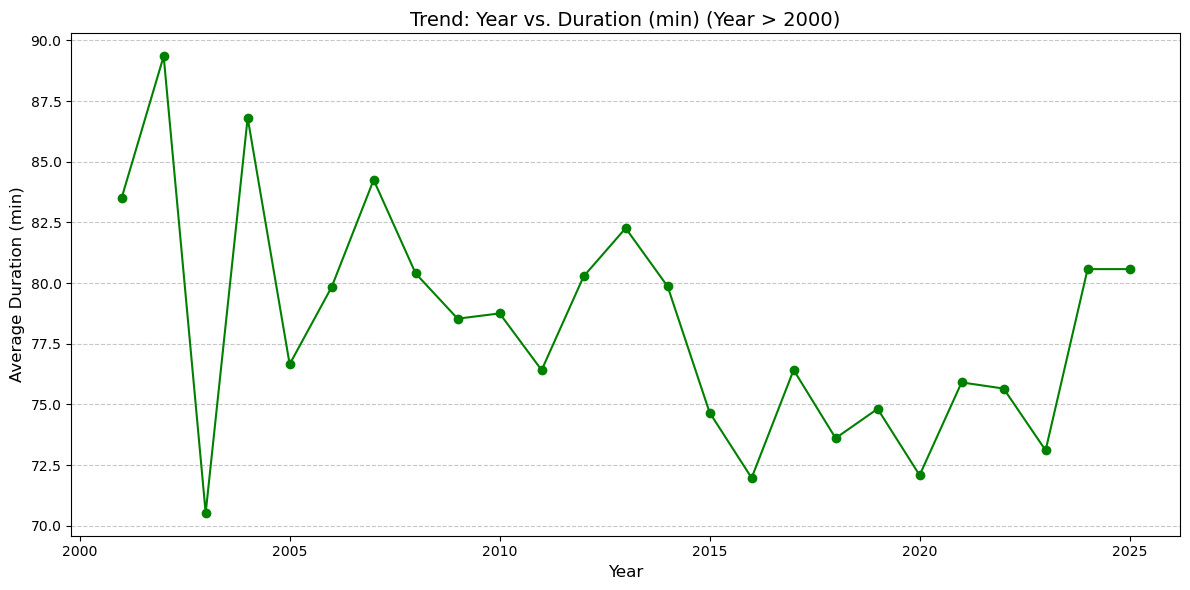

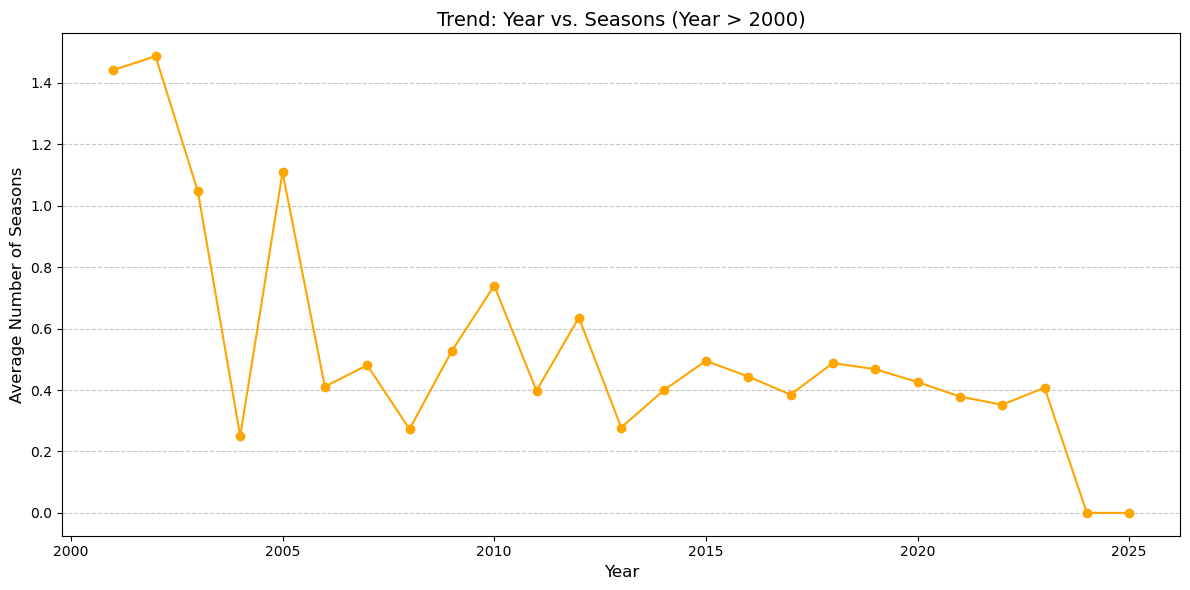

In [29]:
# Ensure 'year', 'rating', 'duration_min', and 'seasons' columns exist in the dataset
if {'year', 'rating', 'duration_min', 'seasons'}.issubset(df.columns):
    # Filter for years greater than 2000
    filtered_df = df[df['year'] > 2000]
    
    # Group by year and calculate the mean for each variable
    yearly_trends = filtered_df.groupby('year').agg({
        'rating': 'mean',
        'duration_min': 'mean',
        'seasons': 'mean'
    }).reset_index()

    # Chart 1: Year vs. Rating
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_trends['year'], yearly_trends['rating'], marker='o', color='blue')
    plt.title('Trend: Year vs. Rating (Year > 2000)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Chart 2: Year vs. Duration (min)
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_trends['year'], yearly_trends['duration_min'], marker='o', color='green')
    plt.title('Trend: Year vs. Duration (min) (Year > 2000)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Duration (min)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Chart 3: Year vs. Seasons
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_trends['year'], yearly_trends['seasons'], marker='o', color='orange')
    plt.title('Trend: Year vs. Seasons (Year > 2000)', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Number of Seasons', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("The required columns ('year', 'rating', 'duration_min', 'seasons') are not in the dataset.")


## 4. Categorical Analysis

In [31]:
# Filter the countries with frequency > 100 if needed
country_counts = df['production_countries'].value_counts()
filtered_countries = country_counts[country_counts > 100].index

# Create a cross-tabulation
country_type_crosstab = pd.crosstab(
    df[df['production_countries'].isin(filtered_countries)]['production_countries'],
    df['type']
)
print(country_type_crosstab)  # Inspect the cross-tabulation table


type                  Movie  Show  Unknown
production_countries                      
ES                       53    80        0
GB                       45   146        0
IN                      473    54        0
JP                       85   169        0
KR                       25   206        0
UNKNOWN                4456  1385      205
US                      730   821        0


In [33]:
# Remove rows where 'production_countries' or 'type' is 'Unknown'
filtered_df = df[(df['production_countries'] != 'Unknown') & (df['type'] != 'Unknown')]

# Filter the countries with frequency > 100 after removing 'Unknown'
country_counts = filtered_df['production_countries'].value_counts()
filtered_countries = country_counts[country_counts > 100].index

# Create a cross-tabulation with filtered data
country_type_crosstab = pd.crosstab(
    filtered_df[filtered_df['production_countries'].isin(filtered_countries)]['production_countries'],
    filtered_df['type']
)

# Inspect the cross-tabulation table
print(country_type_crosstab)

type                  Movie  Show
production_countries             
ES                       53    80
GB                       45   146
IN                      473    54
JP                       85   169
KR                       25   206
UNKNOWN                4456  1385
US                      730   821


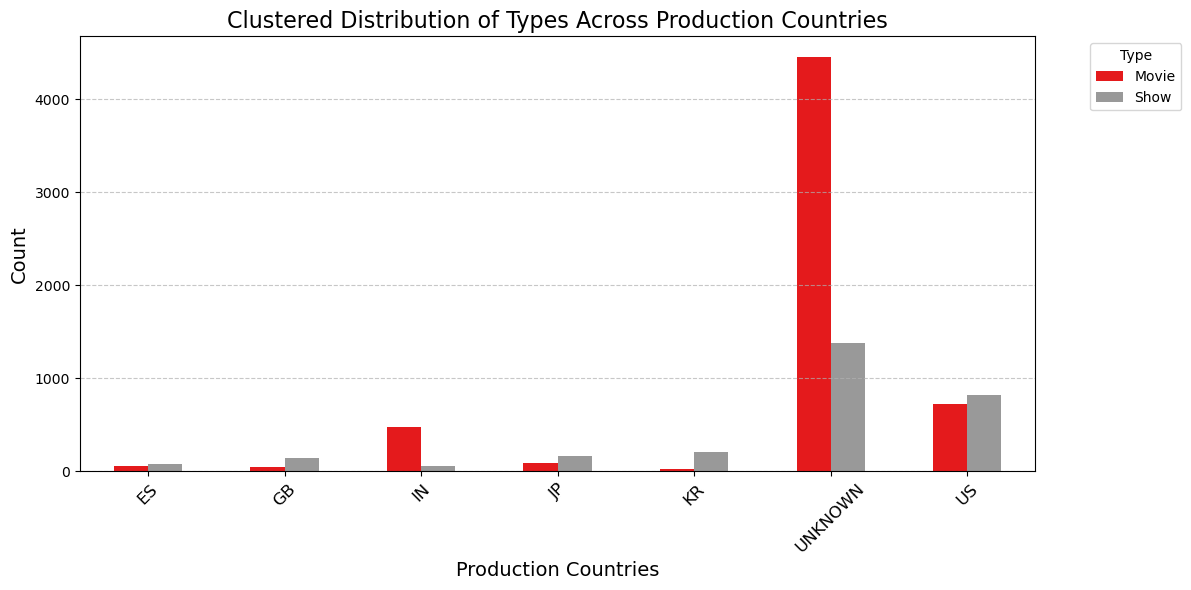

In [35]:
# Generate a clustered bar chart
country_type_crosstab.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set1')

# Add chart titles and labels
plt.title('Clustered Distribution of Types Across Production Countries', fontsize=16)
plt.xlabel('Production Countries', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

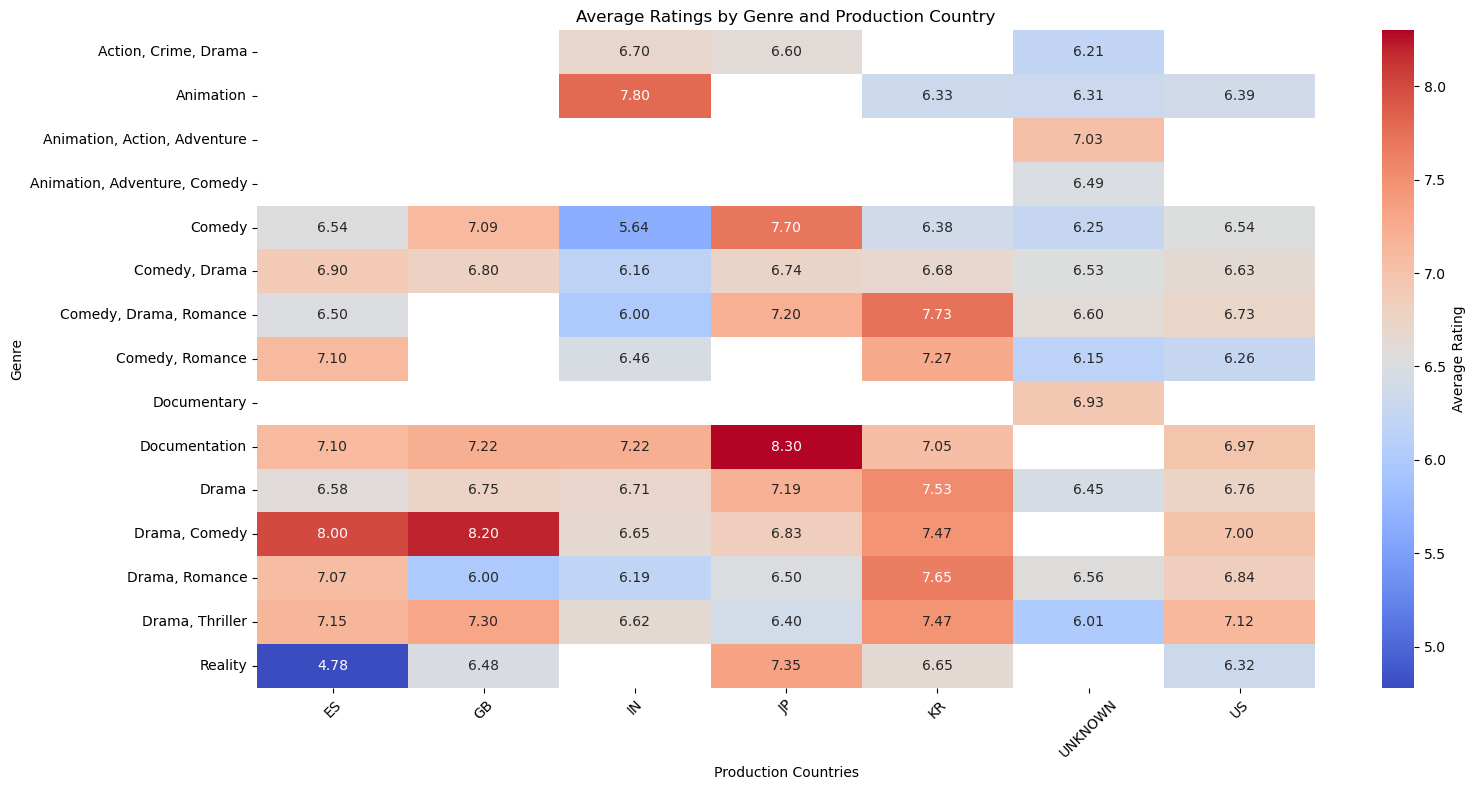

In [37]:
# Filter relevant data
filtered_countries = df['production_countries'].value_counts()
filtered_genres = df['genre'].value_counts()

filtered_countries = filtered_countries[filtered_countries > 100].index
filtered_genres = filtered_genres[filtered_genres > 100].index

filtered_data = df[
    (df['production_countries'].isin(filtered_countries)) &
    (df['genre'].isin(filtered_genres)) &
    (df['production_countries'] != 'Unknown') &
    (df['genre'] != 'Unknown')
]

# Group by genre and country, then calculate average rating
genre_country_rating = filtered_data.groupby(['genre', 'production_countries'])['rating'].mean().reset_index()

# Pivot table for the heatmap
pivot_table = genre_country_rating.pivot(
    index='genre',
    columns='production_countries',
    values='rating'
)

# Plotting the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Rating'})
plt.title('Average Ratings by Genre and Production Country')
plt.xlabel('Production Countries')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()